In [24]:
# !pip install tabulate
import pandas as pd
import re
from collections import defaultdict

In [25]:
df = pd.read_csv("songs_soundchart.csv")
df.head()

Song                             Song uuid  \
0    Blinding Lights  b6ac0f7e-112b-11ea-8a46-a81e84f2a475   
1       Shape of You  11e826a3-6ed8-a3f2-b5be-a0369fe50396   
2  Someone You Loved  1fcf0080-e45d-11e8-ba0b-549f35141000   
3            Starboy  11e826b6-adac-861c-a40a-a0369fe50396   
4            Starboy  11e826b6-adf8-c900-a130-a0369fe50396   

                                            Song url     Song isrc  \
0  https://app.soundcharts.com/app/song/b6ac0f7e-...  USUG11904206   
1  https://app.soundcharts.com/app/song/11e826a3-...  GBAHS1600463   
2  https://app.soundcharts.com/app/song/1fcf0080-...  DEUM71807062   
3  https://app.soundcharts.com/app/song/11e826b6-...  USUG11600976   
4  https://app.soundcharts.com/app/song/11e826b6-...  USUG11600977   

     ISRC Country Release date        Song genres  \
0   United States   2019-11-29                R&B   
1  United Kingdom   2017-01-06          Pop, Folk   
2         Germany   2018-11-08  Alternative, Rock   
3   United States   2016-09-22       R&B, Electro   
4   United States   2016-11-24       R&B, Electro   

                            Song sub genres           Label        Label type  \
0                     R&B, R&B, Funk & Soul    Republic, XO  Universal, Indie   
1                    Pop, Singer/Songwriter          Asylum            Warner   
2                         Alternative, Rock  Vertigo Berlin         Universal   
3  Dance, Electronic, R&B, R&B, Funk & Soul    Republic, XO  Universal, Indie   
4  Dance, Electronic, R&B, R&B, Funk & Soul    Republic, XO  Universal, Indie   

   ... Boomplay favorites Change % Genius views Total  Genius views Change  \
0  ...                         NaN          2968511.0               9275.0   
1  ...                         NaN         15431942.0              34522.0   
2  ...                         NaN                NaN                  NaN   
3  ...                         NaN          9306650.0              64732.0   
4  ...                         NaN                NaN                  NaN   

  Genius views Change % Melon likes Total Melon likes Change  \
0                  0.31          117927.0              613.0   
1                  0.22          347657.0              137.0   
2                   NaN               NaN                NaN   
3                  0.70           37795.0               77.0   
4                   NaN               NaN                NaN   

   Melon likes Change % Audiomack plays Total Audiomack plays Change  \
0                  0.52                   NaN                    NaN   
1                  0.04                   NaN                    NaN   
2                   NaN                   NaN                    NaN   
3                  0.20                   NaN                    NaN   
4                   NaN                   NaN                    NaN   

  Audiomack plays Change %  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 70 columns]

In [26]:
# Used to speed up column selection
# column_names_list = df.columns.tolist()
# column_names_list

['Song',
 'Song uuid',
 'Song url',
 'Song isrc',
 'ISRC Country',
 'Release date',
 'Song genres',
 'Song sub genres',
 'Label',
 'Label type',
 'Artist(s)',
 'Artist Country',
 'Explicit',
 'Themes',
 'Moods',
 'People mention',
 'Cultural references',
 'Brands',
 'Narrative style',
 'Locations',
 'Emotional intensity',
 'Imagery',
 'Complexity',
 'Rhyme scheme',
 'Repetitiveness',
 'Spotify stream Total',
 'Spotify stream Change',
 'Spotify stream Change %',
 'Spotify popularity Total',
 'Spotify popularity Change',
 'Spotify popularity Change %',
 'Youtube views Total',
 'Youtube views Change',
 'Youtube views Change %',
 'Tiktok videos Total',
 'Tiktok videos Change',
 'Tiktok videos Change %',
 'Airplay plays Total',
 'Airplay plays Change',
 'Airplay plays Change %',
 'Shazam counts Total',
 'Shazam counts Change',
 'Shazam counts Change %',
 'Soundcloud plays Total',
 'Soundcloud plays Change',
 'Soundcloud plays Change %',
 'Line-music streams Total',
 'Line-music streams Change',
 'Line-music streams Change %',
 'Anghami plays Total',
 'Anghami plays Change',
 'Anghami plays Change %',
 'Gaana favorites Total',
 'Gaana favorites Change',
 'Gaana favorites Change %',
 'Jiosaavn plays Total',
 'Jiosaavn plays Change',
 'Jiosaavn plays Change %',
 'Boomplay favorites Total',
 'Boomplay favorites Change',
 'Boomplay favorites Change %',
 'Genius views Total',
 'Genius views Change',
 'Genius views Change %',
 'Melon likes Total',
 'Melon likes Change',
 'Melon likes Change %',
 'Audiomack plays Total',
 'Audiomack plays Change',
 'Audiomack plays Change %']

In [27]:
columns_to_keep = ['Song',
 'Song uuid',
 'Song url',
 'Song isrc',
 'ISRC Country',
 'Release date',
 'Song genres',
 'Artist(s)',
 'Artist Country',
 'Themes',
 'Spotify stream Total',
 'Spotify stream Change',
 'Spotify stream Change %',
 'Spotify popularity Total',
 'Spotify popularity Change',
 'Spotify popularity Change %',
 'Youtube views Total',
 'Tiktok videos Total',
 'Airplay plays Total',
 'Shazam counts Total']

# Filter the DataFrame to keep only the desired columns
filtered_df = df[columns_to_keep]


In [28]:
filtered_df.head(10)

Song  \
0                                Blinding Lights   
1                                   Shape of You   
2                              Someone You Loved   
3                                        Starboy   
4                                        Starboy   
5  Sunflower (Spider-Man: Into the Spider-Verse)   
6                                Sweater Weather   
7                                Sweater Weather   
8                                      One Dance   
9                                       Believer   

                              Song uuid  \
0  b6ac0f7e-112b-11ea-8a46-a81e84f2a475   
1  11e826a3-6ed8-a3f2-b5be-a0369fe50396   
2  1fcf0080-e45d-11e8-ba0b-549f35141000   
3  11e826b6-adac-861c-a40a-a0369fe50396   
4  11e826b6-adf8-c900-a130-a0369fe50396   
5  8475156c-d6d7-11e8-a15a-525400009efb   
6  11e82693-06c8-f70e-9b64-aa1c026db3d8   
7  11e826d7-0d5b-89b2-ab10-a0369fe50396   
8  11e8268b-996c-6634-b00b-aa1c026db3d8   
9  11e826cc-b06a-01a2-9785-a0369fe50396   

                                            Song url     Song isrc  \
0  https://app.soundcharts.com/app/song/b6ac0f7e-...  USUG11904206   
1  https://app.soundcharts.com/app/song/11e826a3-...  GBAHS1600463   
2  https://app.soundcharts.com/app/song/1fcf0080-...  DEUM71807062   
3  https://app.soundcharts.com/app/song/11e826b6-...  USUG11600976   
4  https://app.soundcharts.com/app/song/11e826b6-...  USUG11600977   
5  https://app.soundcharts.com/app/song/8475156c-...  USUM71814888   
6  https://app.soundcharts.com/app/song/11e82693-...  USSM11300080   
7  https://app.soundcharts.com/app/song/11e826d7-...  USSM11204647   
8  https://app.soundcharts.com/app/song/11e8268b-...  USCM51600028   
9  https://app.soundcharts.com/app/song/11e826cc-...  USUM71700626   

     ISRC Country Release date          Song genres              Artist(s)  \
0   United States   2019-11-29                  R&B             The Weeknd   
1  United Kingdom   2017-01-06            Pop, Folk             Ed Sheeran   
2         Germany   2018-11-08    Alternative, Rock          Lewis Capaldi   
3   United States   2016-09-22         R&B, Electro  Daft Punk, The Weeknd   
4   United States   2016-11-24         R&B, Electro  Daft Punk, The Weeknd   
5   United States   2018-10-18  Hip Hop, Soundtrack  Post Malone, Swae Lee   
6   United States   2012-01-01    Alternative, Rock      The Neighbourhood   
7   United States   2012-08-07          Alternative      The Neighbourhood   
8   United States   2016-04-05              Hip Hop    Drake, Kyla, WizKid   
9   United States   2017-01-31         Electro, Pop        Imagine Dragons   

                    Artist Country  \
0                           Canada   
1                   United Kingdom   
2                   United Kingdom   
3                   France, Canada   
4                   France, Canada   
5     United States, United States   
6                    United States   
7                    United States   
8  Canada, United Kingdom, Nigeria   
9                    United States   

                                              Themes  Spotify stream Total  \
0             Loneliness, Love, Heartbreak, Escapism            4673836529   
1        Love, Relationships, Desire, Self-discovery            4193269875   
2    Heartbreak, Depression, Love, Loneliness, Grief            3770959284   
3   Ambition, Materialism, Success, Love, Loneliness            3704089716   
4   Ambition, Materialism, Success, Love, Loneliness            3704089716   
5        Heartbreak, Love, Relationships, Loneliness            3683693906   
6  Love, Relationships, Loneliness, Desire, Intimacy            3524300277   
7                          Love, Happiness, Escapism            3524300277   
8  Love, Dance and partying, Escapism, Friendship...            3503488880   
9  Empowerment, Pain, Overcoming adversity, Self-...            3300915632   

   Spotify stream Change  Spotify stream Change %  Spotify popularity Total  \
0         

In [29]:
# This will drop rows where 'Song genres' has NaN values and return a new DataFrame
df_cleaned = filtered_df.dropna(subset=['Song genres']).copy()  # Had to use .copy() to avoid SettingWithCopyWarning
df_cleaned.head()

Song                             Song uuid  \
0    Blinding Lights  b6ac0f7e-112b-11ea-8a46-a81e84f2a475   
1       Shape of You  11e826a3-6ed8-a3f2-b5be-a0369fe50396   
2  Someone You Loved  1fcf0080-e45d-11e8-ba0b-549f35141000   
3            Starboy  11e826b6-adac-861c-a40a-a0369fe50396   
4            Starboy  11e826b6-adf8-c900-a130-a0369fe50396   

                                            Song url     Song isrc  \
0  https://app.soundcharts.com/app/song/b6ac0f7e-...  USUG11904206   
1  https://app.soundcharts.com/app/song/11e826a3-...  GBAHS1600463   
2  https://app.soundcharts.com/app/song/1fcf0080-...  DEUM71807062   
3  https://app.soundcharts.com/app/song/11e826b6-...  USUG11600976   
4  https://app.soundcharts.com/app/song/11e826b6-...  USUG11600977   

     ISRC Country Release date        Song genres              Artist(s)  \
0   United States   2019-11-29                R&B             The Weeknd   
1  United Kingdom   2017-01-06          Pop, Folk             Ed Sheeran   
2         Germany   2018-11-08  Alternative, Rock          Lewis Capaldi   
3   United States   2016-09-22       R&B, Electro  Daft Punk, The Weeknd   
4   United States   2016-11-24       R&B, Electro  Daft Punk, The Weeknd   

   Artist Country                                            Themes  \
0          Canada            Loneliness, Love, Heartbreak, Escapism   
1  United Kingdom       Love, Relationships, Desire, Self-discovery   
2  United Kingdom   Heartbreak, Depression, Love, Loneliness, Grief   
3  France, Canada  Ambition, Materialism, Success, Love, Loneliness   
4  France, Canada  Ambition, Materialism, Success, Love, Loneliness   

   Spotify stream Total  Spotify stream Change  Spotify stream Change %  \
0            4673836529               45739583                     0.99   
1            4193269875               33855890                     0.81   
2            3770959284               36229005                     0.97   
3            3704089716               49815366                     1.36   
4            3704089716               49815366                     1.36   

   Spotify popularity Total  Spotify popularity Change  \
0                      87.0                        1.0   
1                      85.0                        0.0   
2                      68.0                        2.0   
3                      87.0                        0.0   
4                      56.0                        0.0   

   Spotify popularity Change %  Youtube views Total  Tiktok videos Total  \
0                         1.16         9.144275e+08            2705250.0   
1                         0.00         7.967218e+09            1701532.0   
2                         3.03         6.937573e+08            1932891.0   
3                         0.00         3.133207e+09             208252.0   
4                         0.00         2.585120e+06                  NaN   

   Airplay plays Total  Shazam counts Total  
0             154656.0           30027808.0  
1              82429.0           28875592.0  
2              54922.0           30360617.0  
3              17346.0           16387360.0  
4                 48.0           16385428.0

In [30]:
# This was unique given the data in Release date. Just doing 1 .fillna would not work. We had to first fill NaN values with a string version of 1776 (Just to have a value of something), to keep the regex from breaking due to a int being where it was looking for a string.

# Fill NaN values in 'Release date' with 1776 and convert to string
df_cleaned['Year Released'] = df_cleaned['Release date'].fillna('1776').astype(str)

# Extract the year from 'Year Released' using regex
df_cleaned['Year Released'] = df_cleaned['Year Released'].str.extract(r'(\d{4})')

# Fill any remaining NaN values in 'Year Released' with 1776
df_cleaned['Year Released'] = df_cleaned['Year Released'].fillna(1776)

# Convert the 'Year Released' column to integers so further mathamatical processes can be done
df_cleaned['Year Released'] = df_cleaned['Year Released'].astype(int)

In [31]:
# Display the DataFrame with the extracted year
print(df_cleaned[['Release date', 'Year Released']])

      Release date  Year Released
0       2019-11-29           2019
1       2017-01-06           2017
2       2018-11-08           2018
3       2016-09-22           2016
4       2016-11-24           2016
...            ...            ...
49995   2018-04-25           2018
49996   2019-12-27           2019
49997   2018-06-15           2018
49998   2006-09-12           2006
49999   2006-05-09           2006

[50000 rows x 2 columns]


In [32]:
from collections import defaultdict

In [33]:
# Initialize an empty defaultdict to store the unique genres
genre_dict = defaultdict(int)

In [34]:
# Iterate over each row in the "Song genres" column
for genres in df_cleaned['Song genres'].dropna():  # Drop NaNs to avoid errors
    # Split the genres by commas (if multiple genres are listed)
    genre_list = genres.split(',')
    
    # Iterate over the list of genres
    for genre in genre_list:
        # Strip any leading or trailing spaces and add the genre to the dictionary
        genre_dict[genre.strip().lower()] += 1

# Convert the dictionary to a regular dictionary to view the result (optional)
genre_dict = dict(genre_dict)

# Display the dictionary with unique genres and their count
print(genre_dict)

{'r&b': 6454, 'pop': 20210, 'folk': 2044, 'alternative': 7832, 'rock': 19949, 'electro': 6604, 'hip hop': 11507, 'soundtrack': 1512, 'metal': 1949, 'country': 2507, 'latin': 6108, 'blues': 483, 'others': 1383, 'reggae': 361, 'african': 7, 'jazz': 1704, 'kids': 157, 'spirituals': 517, 'classical': 792, 'sports': 12, 'asian': 285, 'holiday': 11, 'instrumental': 4, 'spoken': 75, 'european': 20}


In [35]:
# Sort the dictionary by the count (values) in descending order
sorted_genres = {k: v for k, v in sorted(genre_dict.items(), key=lambda item: item[1], reverse=True)}

# Display the sorted dictionary
print(sorted_genres)

{'pop': 20210, 'rock': 19949, 'hip hop': 11507, 'alternative': 7832, 'electro': 6604, 'r&b': 6454, 'latin': 6108, 'country': 2507, 'folk': 2044, 'metal': 1949, 'jazz': 1704, 'soundtrack': 1512, 'others': 1383, 'classical': 792, 'spirituals': 517, 'blues': 483, 'reggae': 361, 'asian': 285, 'kids': 157, 'spoken': 75, 'european': 20, 'sports': 12, 'holiday': 11, 'african': 7, 'instrumental': 4}


In [36]:
# Get the top 15 genres
top_15_genres = dict(list(sorted_genres.items())[:15])

# Print the top 15 genres
print(top_15_genres)

{'pop': 20210, 'rock': 19949, 'hip hop': 11507, 'alternative': 7832, 'electro': 6604, 'r&b': 6454, 'latin': 6108, 'country': 2507, 'folk': 2044, 'metal': 1949, 'jazz': 1704, 'soundtrack': 1512, 'others': 1383, 'classical': 792, 'spirituals': 517}


In [37]:
# Get the count of non-NaN values in the 'Spotify stream Total' column
count_non_nan_values = filtered_df['Spotify stream Total'].count()

# Display the count
print(count_non_nan_values)

50000


In [38]:
# Count non-NaN values in the 'Spotify stream Total' column that are not 0
count_non_nan_non_zero = filtered_df[filtered_df['Spotify stream Total'] != 0]['Spotify stream Total'].count()

# Display the count
print(count_non_nan_non_zero)

50000


In [39]:
from tabulate import tabulate

# Pretty print the first 20 rows of the DataFrame using tabulate
print(tabulate(df_cleaned.head(20), headers='keys', tablefmt='pretty', showindex=False))

+-----------------------------------------------+--------------------------------------+------------------------------------------------------------------------------------+--------------+----------------+--------------+---------------------------------+----------------------------+---------------------------------+----------------------------------------------------------+----------------------+-----------------------+-------------------------+--------------------------+---------------------------+-----------------------------+---------------------+---------------------+---------------------+---------------------+---------------+
|                     Song                      |              Song uuid               |                                      Song url                                      |  Song isrc   |  ISRC Country  | Release date |           Song genres           |         Artist(s)          |         Artist Country          |                          Themes            

In [40]:
# Pretty print the first 15 rows of the Cleaned.csv using tabulate
cleaned_tabulate_df = pd.read_csv('Cleaned.csv')
print(tabulate(cleaned_tabulate_df.head(15), headers='keys', tablefmt='pretty', showindex=False))

+-----------------------------------------------+------------------------------------------------------------------------------------+----------------+-----------------------+-----------------------------------------------+---------------------------------+----------------------+-----------------------+-------------------------+--------------------------+---------------------------+-----------------------------+---------------+
|                     Song                      |                                      Song url                                      |  ISRC Country  |      Song genres      |                   Artist(s)                   |         Artist Country          | Spotify stream Total | Spotify stream Change | Spotify stream Change % | Spotify popularity Total | Spotify popularity Change | Spotify popularity Change % | Year Released |
+-----------------------------------------------+------------------------------------------------------------------------------------+--

In [41]:
# !pip install plotnine
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, theme, element_text, scale_x_continuous
from plotnine import ggsave

c:\Users\mnmat\anaconda3\envs\dev\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_point : Removed 51 rows containing missing values.



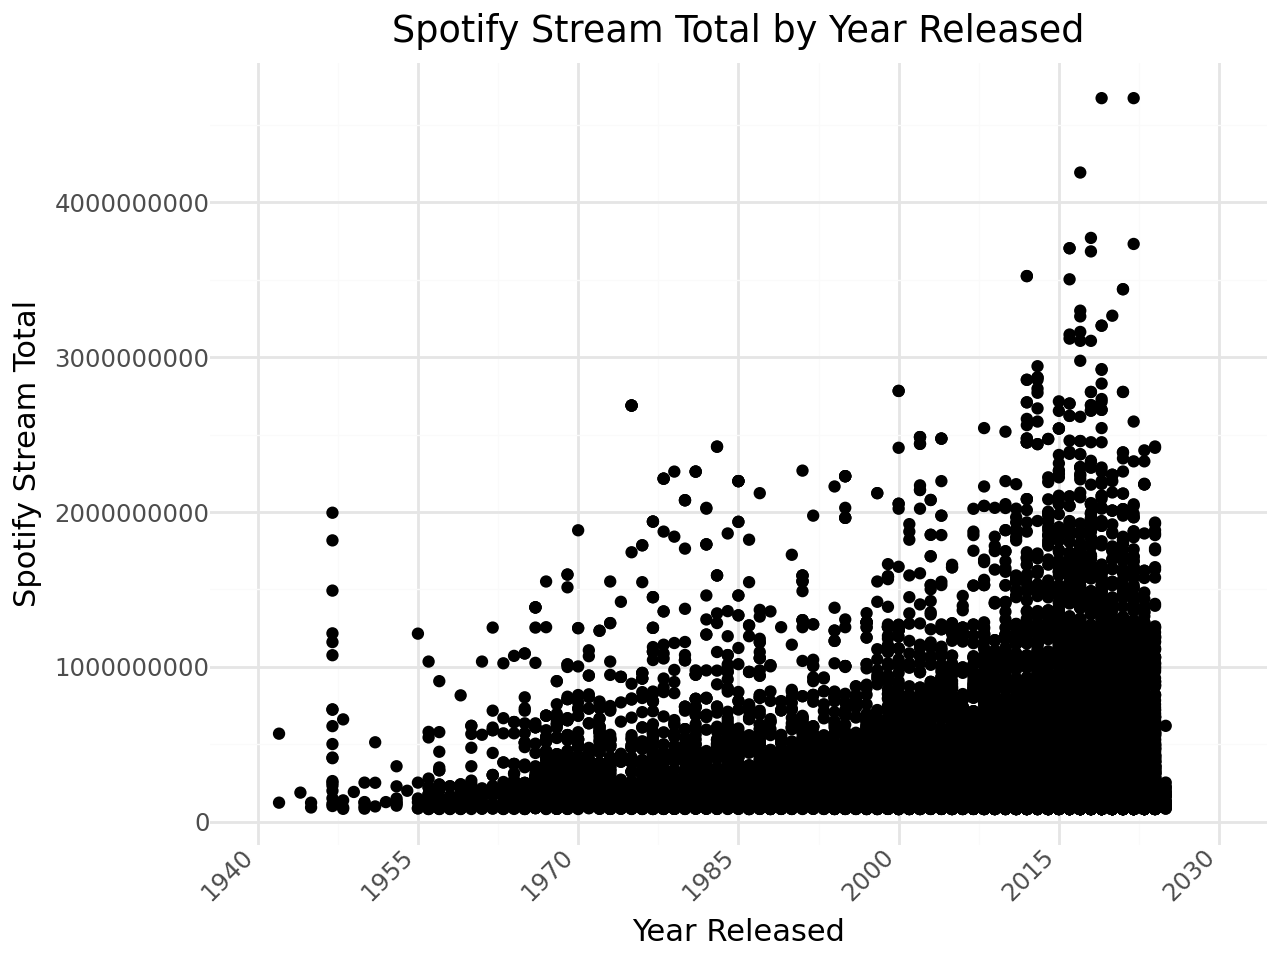

In [42]:
x_ticks = list(range(1925, 2031, 15))  # This will create ticks at 1925, 1940, 1955, etc, every 15 years.

plot = (
    ggplot(cleaned_tabulate_df, aes(x='Year Released', y='Spotify stream Total')) +
    geom_point() +
    theme_minimal() +
    labs(title="Spotify Stream Total by Year Released",
         x="Year Released", y="Spotify Stream Total") +
    theme(axis_text_x = element_text(rotation=45, hjust=1)) +  # Rotate x-axis labels for better readability
    scale_x_continuous(limits=(1940, 2030), breaks=x_ticks)  # Set the x-axis limits from 1940 to 2030
)

# Display the plot directly
plot

c:\Users\mnmat\anaconda3\envs\dev\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_point : Removed 97 rows containing missing values.



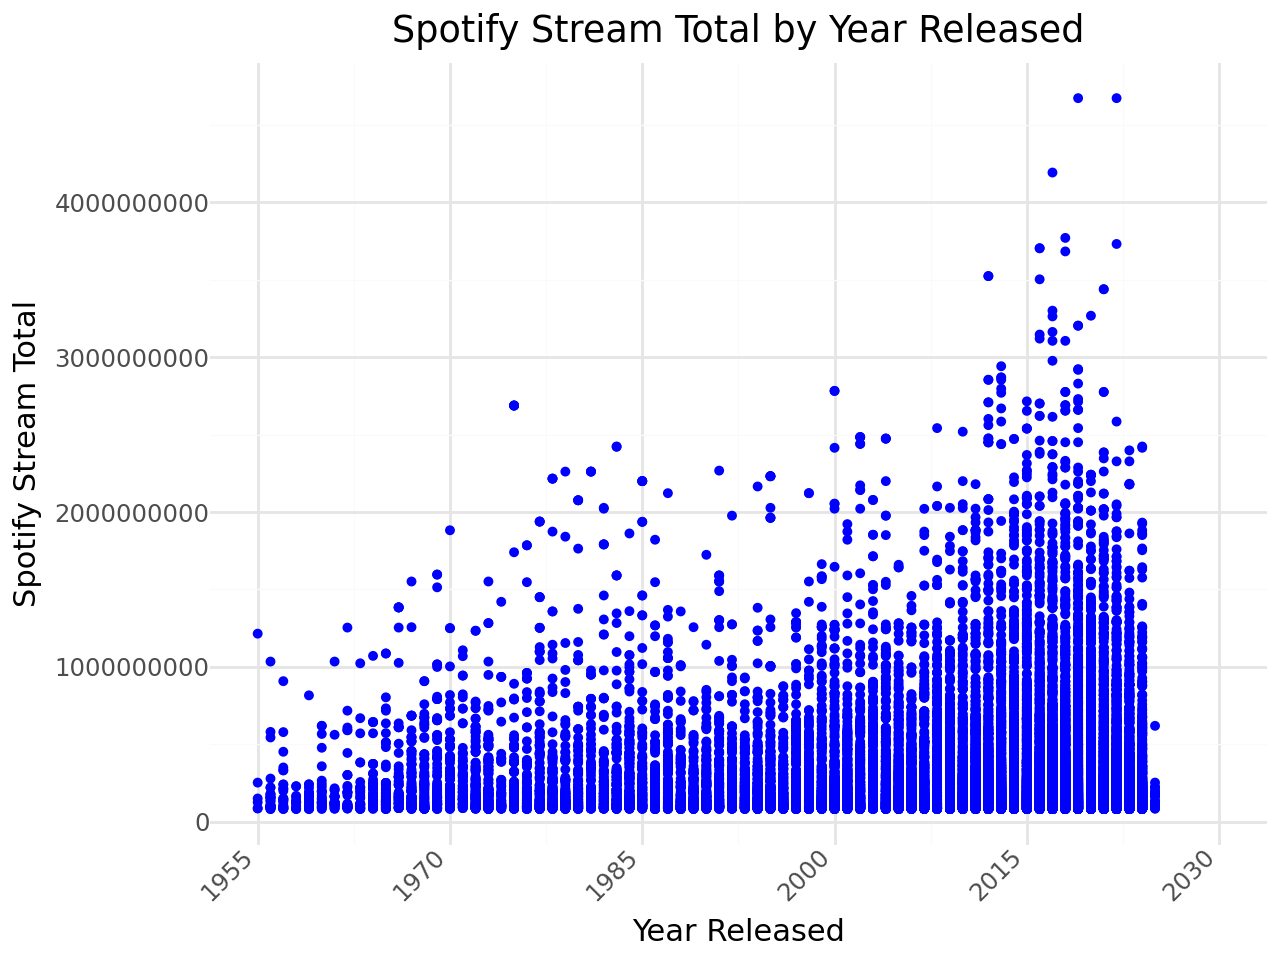

In [43]:
x_ticks = list(range(1955, 2031, 15))

plot = (
    ggplot(cleaned_tabulate_df, aes(x='Year Released', y='Spotify stream Total')) +
    geom_point(size=1, color='blue') +  # Change the size and color of the dots
    theme_minimal() +
    labs(title="Spotify Stream Total by Year Released",
         x="Year Released", y="Spotify Stream Total") +
    theme(axis_text_x = element_text(rotation=45, hjust=1)) +
    scale_x_continuous(limits=(1955, 2030), breaks=x_ticks)
)

plot

In [44]:
# from plotnine import facet_wrap

# plot = (
#     ggplot(cleaned_tabulate_df, aes(x='Year Released', y='Spotify stream Total')) +
#     geom_point(aes(color='Song genres'), alpha=0.7, size=4) +  # Add color and transparency
#     theme_minimal() +
#     labs(title="Spotify Stream Total by Year Released and Song Genre",
#          x="Year Released", y="Spotify Stream Total") +
#     theme(axis_text_x=element_text(rotation=45, hjust=1)) +  # Rotate x-axis labels for readability
#     facet_wrap('~Song genres', ncol=3)  # Facet by genre (adjust ncol as needed)
# )

# # Display the plot
# plot

In [45]:
# !pip install nbformat --upgrade
import plotly.express as px

# Create scatter plot with Plotly Express
fig = px.scatter(cleaned_tabulate_df, 
                 x='Year Released', 
                 y='Spotify stream Total', 
                 color='Song genres',
                 title="Spotify Stream Total by Year Released and Song Genre",
                 hover_data=["Song", "Artist(s)", "Song genres"])  # Add more information to hover text

# Update the layout to include a range slider and customize hover information
fig.update_layout(
    xaxis=dict(
        range=[1945, 2030],  # Set the zoom range for x-axis
        rangeslider=dict(visible=True),  # Add a range slider below the x-axis
        rangemode="tozero"  # Ensure range starts at zero for a cleaner look
    ),
    yaxis=dict(
        rangemode="tozero"  # Make sure the y-axis starts at zero for consistency
    ),
    showlegend=True,  # Display legend for colors
    height=800  # Set the height of the plot (adjust as needed)
)

# Display the plot
fig.show()




In [46]:
fig.write_html("spotify_stream_total_plot.html")